In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.feature_selection import f_classif,chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
import xgboost as xgb
import lightgbm as lgbm

In [220]:
df = pd.read_csv("glass.csv")
print(df.shape)
print(df.info())
df.head()

(214, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [221]:
df.isnull().sum().sum()

np.int64(0)

In [222]:
df.duplicated().sum()

np.int64(1)

In [223]:
df.drop_duplicates(inplace=True, ignore_index=True)
df.duplicated().sum()

np.int64(0)

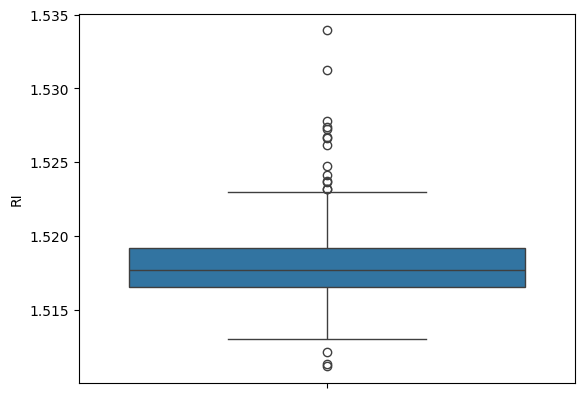

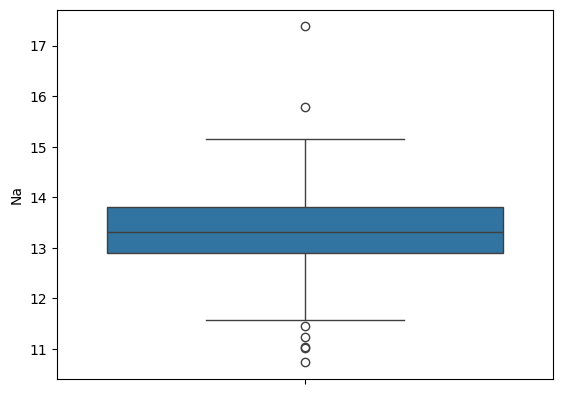

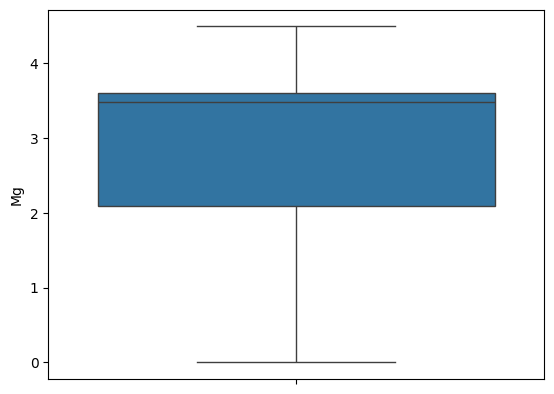

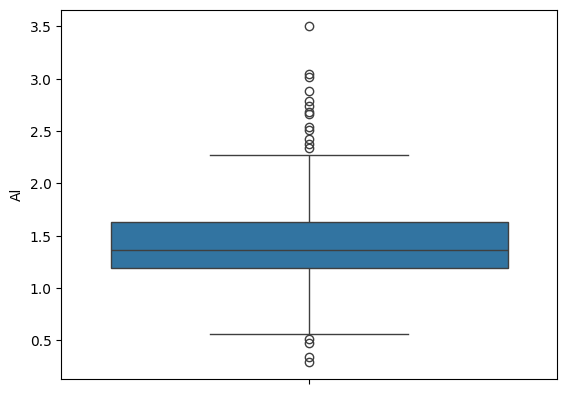

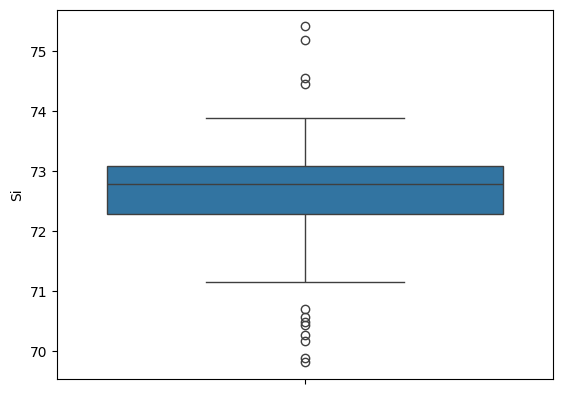

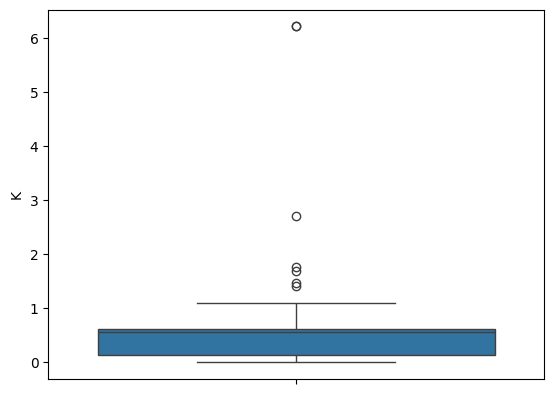

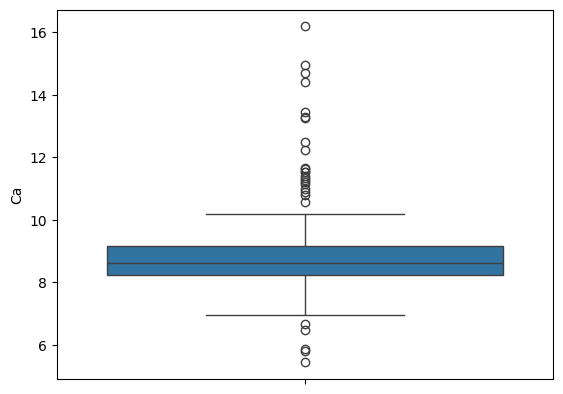

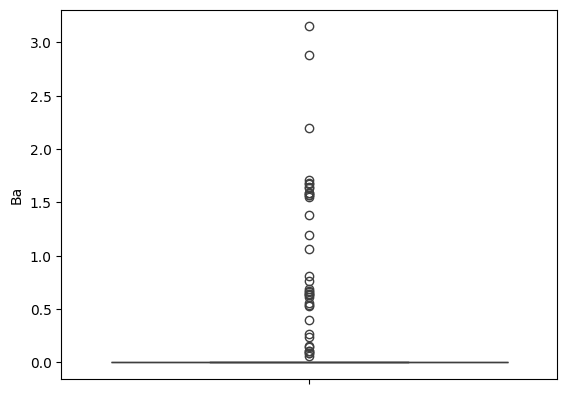

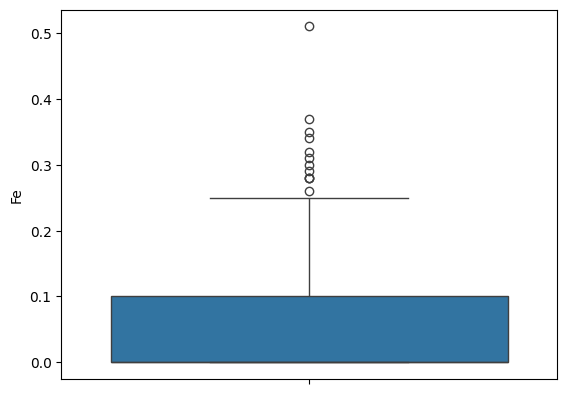

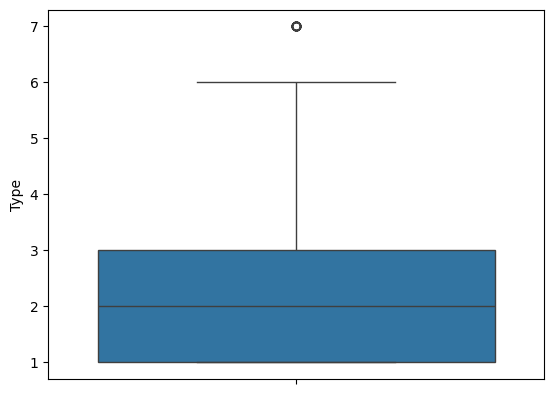

In [224]:
for c in df.select_dtypes(include=["int", "float"]).columns:
    sns.boxplot(data=df, y=c)
    plt.show()


In [225]:
def replace_outliers(df):
    def replace(col):
        Q1 = df[col].quantile(0.25)        
        Q3 = df[col].quantile(0.75)     
        IQR = Q3 - Q1
        lower_extreme = Q1 - 1.5*IQR   
        upper_extreme = Q3 + 1.5*IQR   
        df[col] = df[col].apply(lambda x: lower_extreme if x < lower_extreme else upper_extreme if x > upper_extreme else x)

    for c in df.select_dtypes(include=["int", "float"]).columns:
        replace(c)

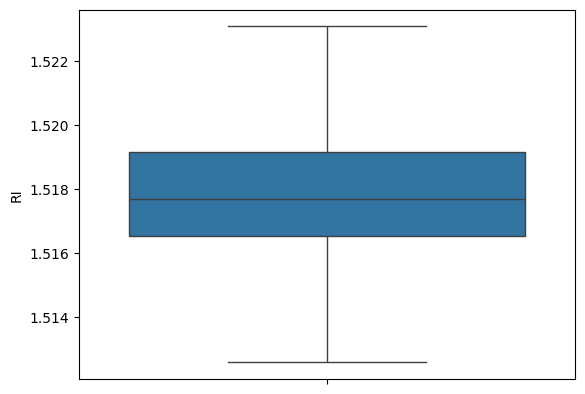

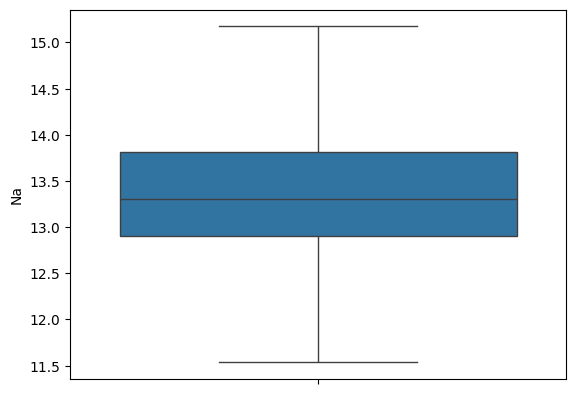

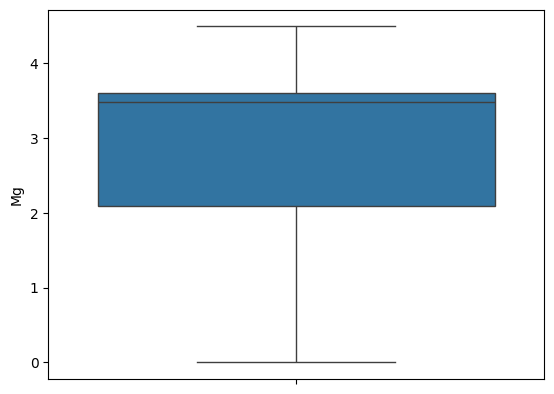

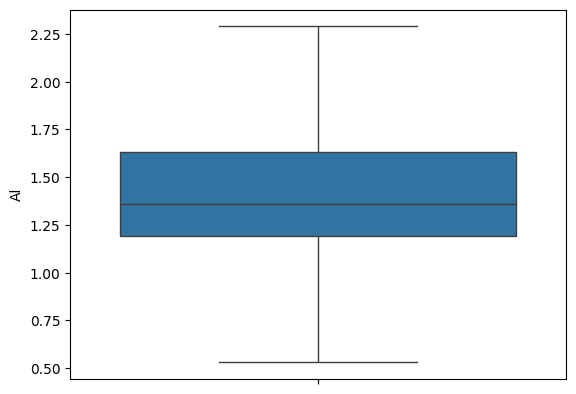

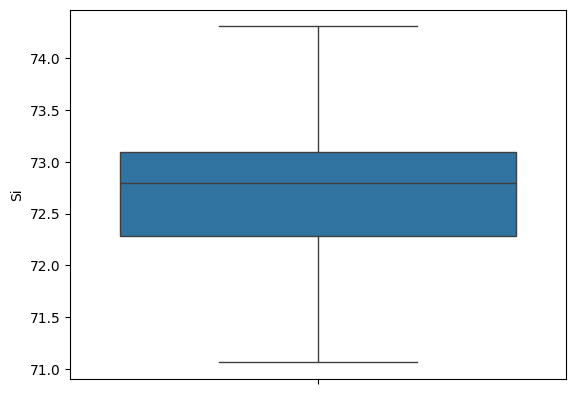

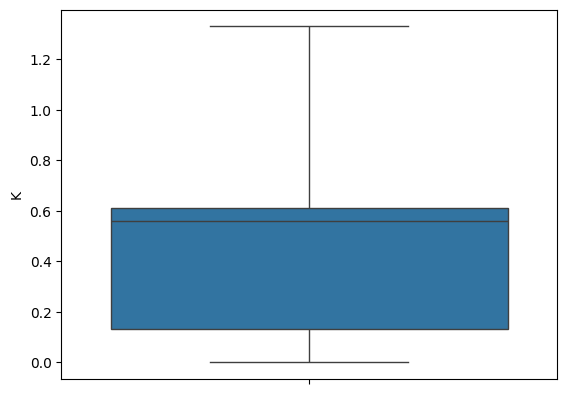

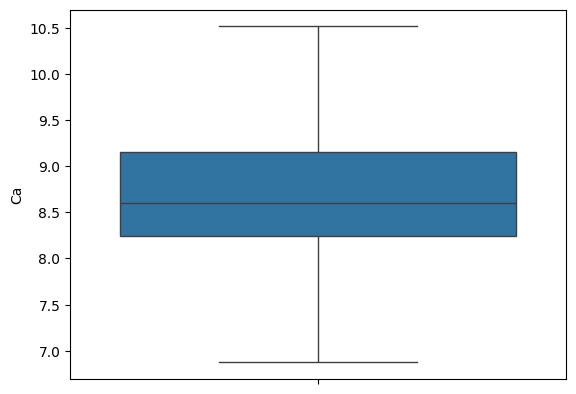

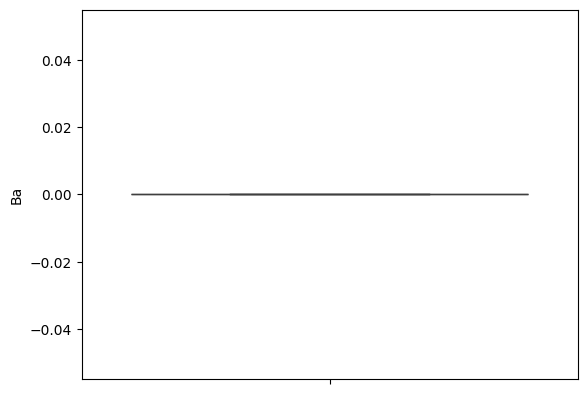

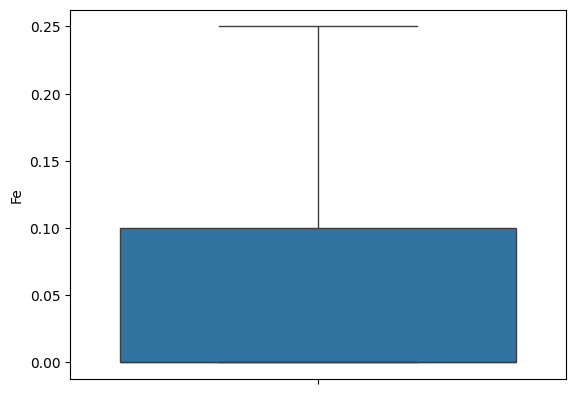

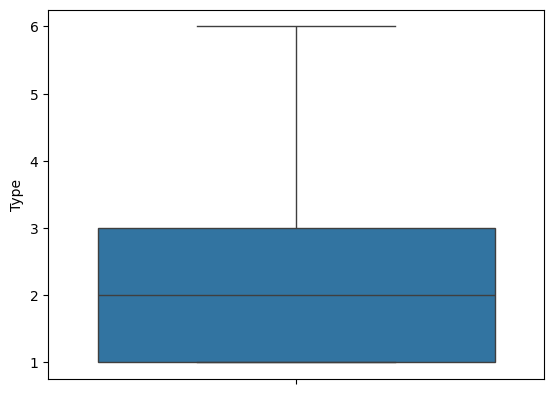

In [226]:
replace_outliers(df)
for col in df.select_dtypes(include=["int", "float"]).columns:
    sns.boxplot(df[col])
    plt.show()

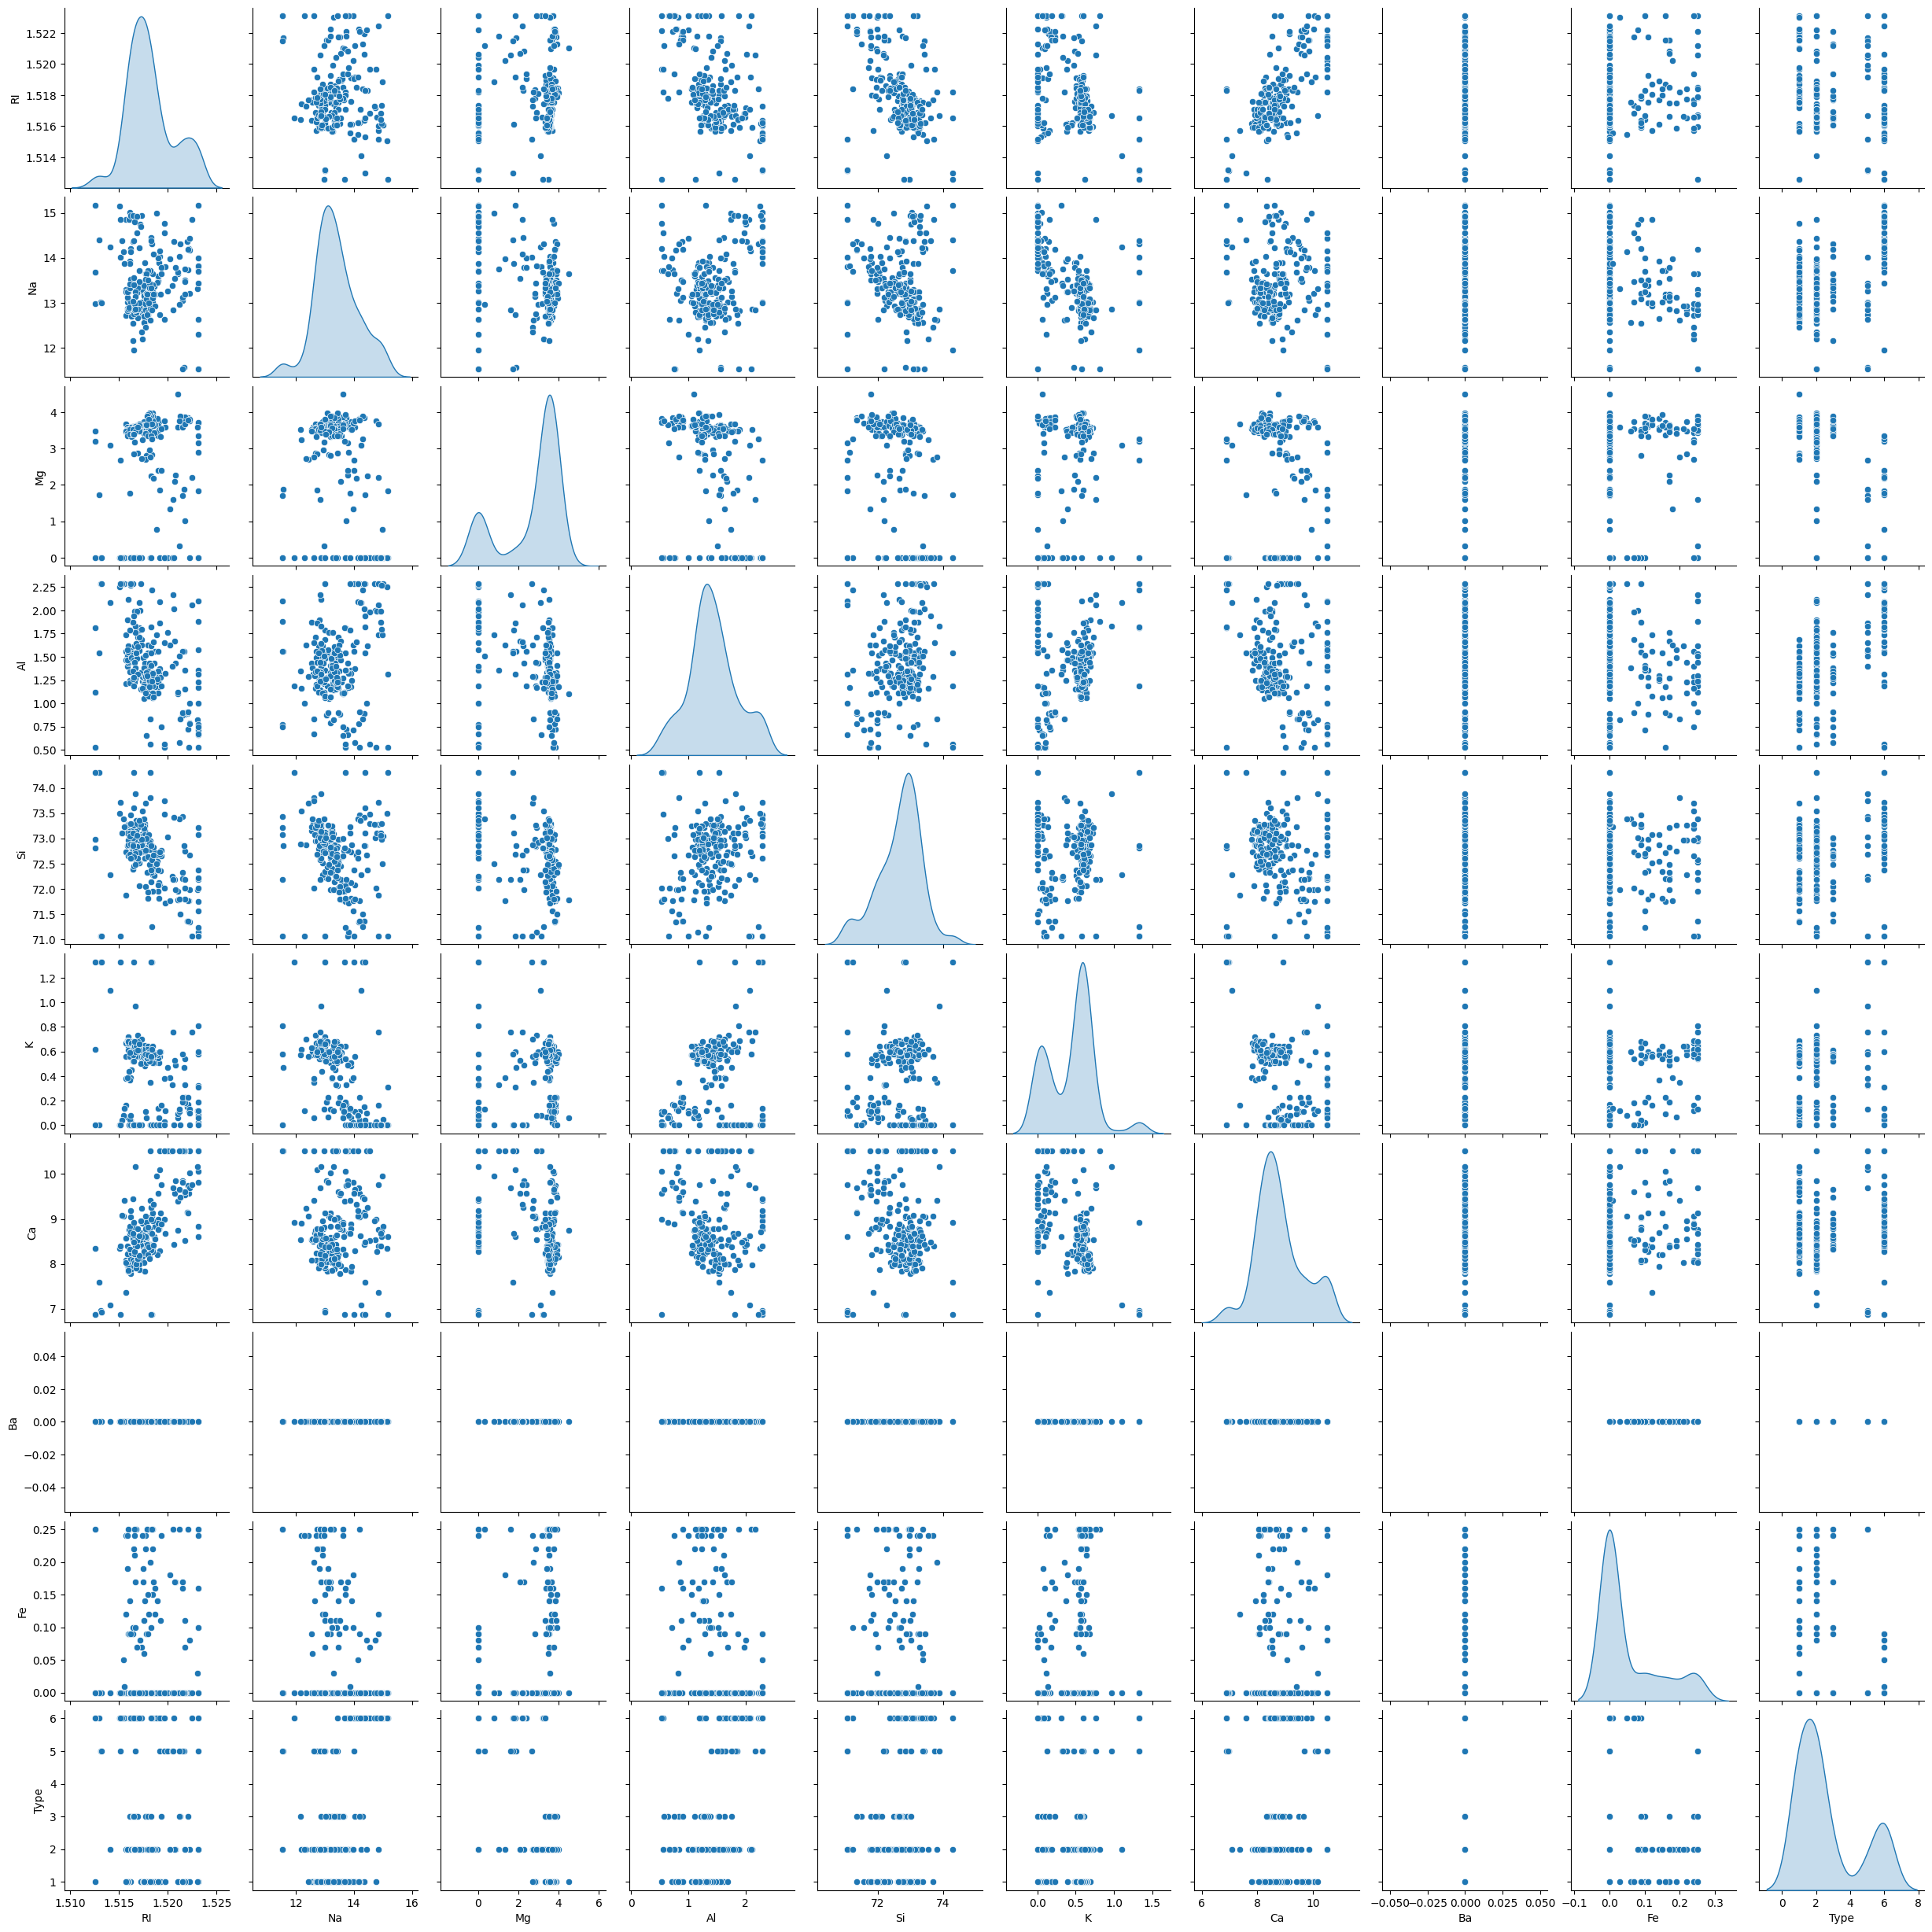

In [227]:
sns.pairplot(df.select_dtypes(include=["int", "float"]), diag_kind="kde")
plt.show()

In [228]:
target = df["Type"]
features = df.drop(columns=["Type"])
features.head()

''' 
 - The feature "Ba" after outlier capping, seems to be having a songle value "0" for all the rows. We can drop the column "Ba".   
'''
df.drop(columns=["Ba"], inplace=True)

[ 2.49061518 39.54964825 78.52677146 33.23724521  3.5509573  11.69637892
  3.09160083         nan  3.94380965]


c:\Users\Karthik\Desktop\Excelr\Python\Assignments\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Karthik\Desktop\Excelr\Python\Assignments\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


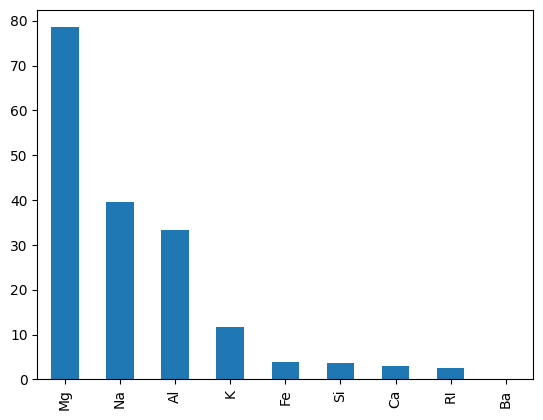

'\n - All numerical features seems to noticeably have some relationshop with the target.\n'

In [229]:
numerical_features = features.select_dtypes(include=["int", "float"])
f_class= f_classif(numerical_features,target)
print(f_class[0])
pd.Series(f_class[0],index=numerical_features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()
'''
 - All numerical features seems to noticeably have some relationshop with the target.
'''

In [230]:
vif= pd.DataFrame()
vif['features']= numerical_features.columns
vif['VIF_Score']= [variance_inflation_factor(numerical_features.values,i) for i in range(len(numerical_features.columns))]
vif.sort_values(ascending=False,by= 'VIF_Score')

c:\Users\Karthik\Desktop\Excelr\Python\Assignments\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,features,VIF_Score
0,RI,25573.208052
4,Si,16363.447473
1,Na,852.285666
6,Ca,370.656737
3,Al,24.688048
2,Mg,12.053818
5,K,8.588862
8,Fe,1.505587
7,Ba,NaN


In [231]:
high_vif_features = [vif["features"][i] for i, score in enumerate(vif["VIF_Score"]) if score > 10]
high_vif_features

['RI', 'Na', 'Mg', 'Al', 'Si', 'Ca']

In [232]:
features.drop(columns=["RI", "Si", "Na", "Ca"], inplace=True)
features.head()

,Mg,Al,K,Ba,Fe
0,4.49,1.10,0.06,0.0,0.0
1,3.60,1.36,0.48,0.0,0.0
2,3.55,1.54,0.39,0.0,0.0
3,3.69,1.29,0.57,0.0,0.0
4,3.62,1.24,0.55,0.0,0.0


# 2. Data Visualization

In [233]:
features.head()

,Mg,Al,K,Ba,Fe
0,4.49,1.10,0.06,0.0,0.0
1,3.60,1.36,0.48,0.0,0.0
2,3.55,1.54,0.39,0.0,0.0
3,3.69,1.29,0.57,0.0,0.0
4,3.62,1.24,0.55,0.0,0.0


<Axes: xlabel='Mg', ylabel='Al'>

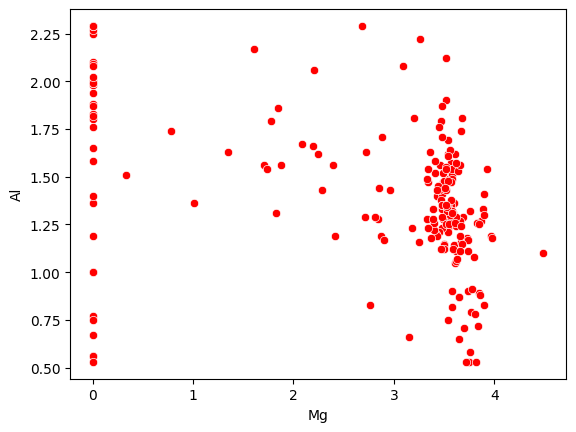

In [234]:
sns.scatterplot(data=df, x=df["Mg"], y=df["Al"], color="red")

<Axes: xlabel='Mg', ylabel='K'>

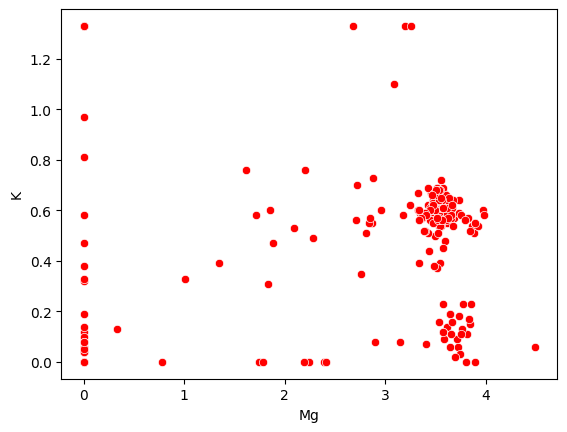

In [235]:
sns.scatterplot(data=df, x=df["Mg"], y=df["K"], color="red")

<Axes: xlabel='Al', ylabel='K'>

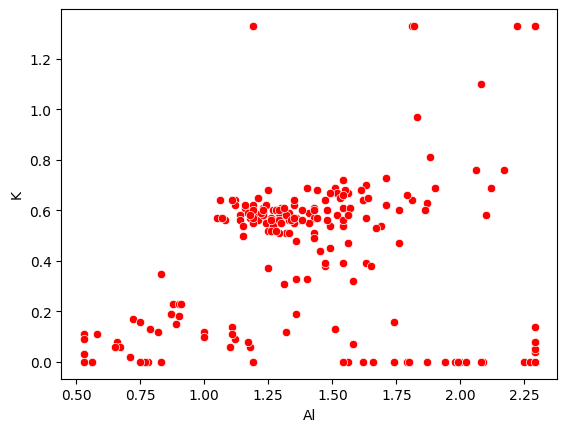

In [236]:
sns.scatterplot(data=df, x=df["Al"], y=df["K"], color="red")

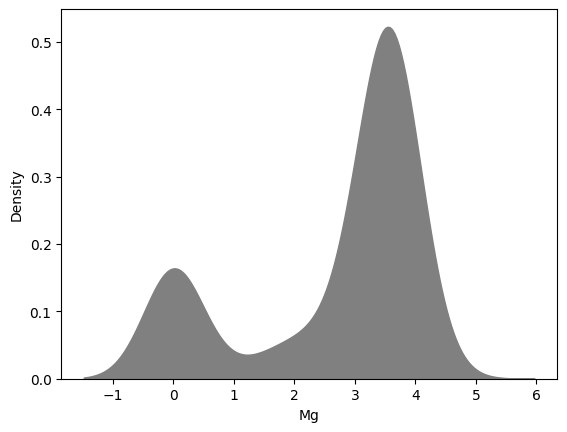

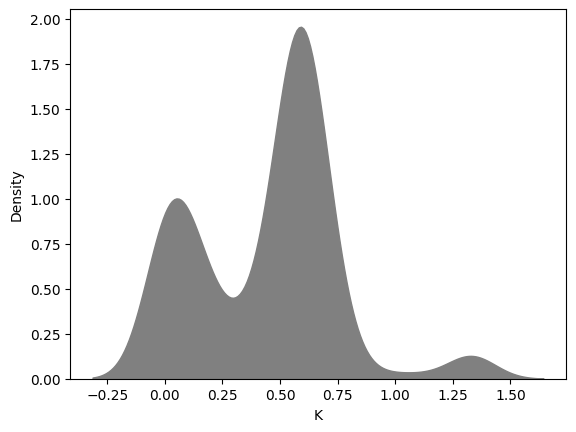

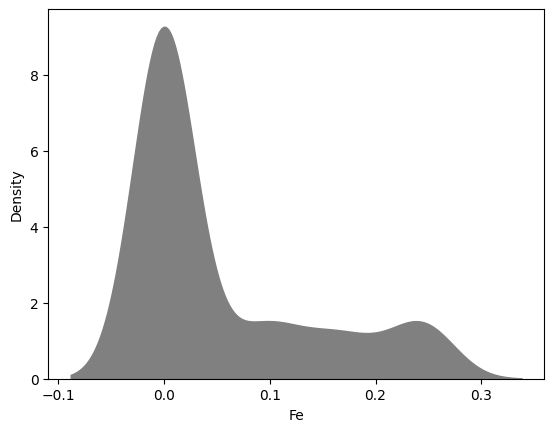

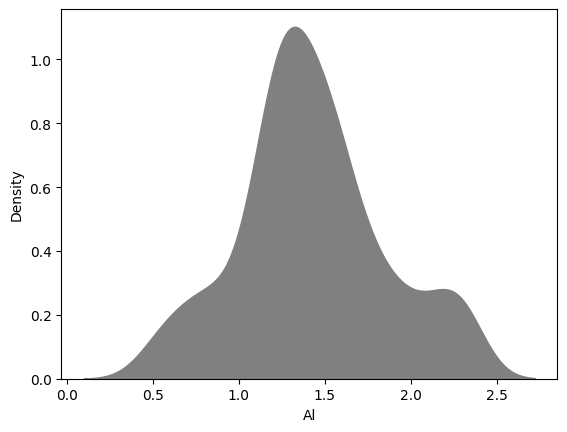

'\n 1) Mg \n - The density plot for Mg shows the data has a Multimodal distribution for a continous dataset. \n - This implies that the dataset likely has two different ranges where the data lie.\n - Most MG values are concentrated at 3 - 4 value\n\n\n 2) K\n - The plot shows multiple peaks, indicating that K values likely come from more than one underlying group or condition.\n - The long tail extending towards higher values 1.5 suggests positive skewness, with a few high-value observations or outliers.\n - The asymmetry and multiple peaks indicate that K does not follow a normal distribution, which may influence modeling choices and feature transformations.\n\n\n 3) Fe\n - Most Fe values are highly concentrated around ~ 0, indicating very low iron levels for a large portion of the data.\n - The long tail extending to the right (up to ~ 0.3) shows positive skewness, meaning fewer observations have higher Fe values.\n - This feature may benefit from log/robust scaling or transformation

In [237]:
# density plot
sns.kdeplot(data=df, x="Mg", fill=True, color="grey", alpha=1)
plt.show()
sns.kdeplot(data=df, x="K", fill=True, color="grey", alpha=1)
plt.show()
sns.kdeplot(data=df, x="Fe", fill=True, color="grey", alpha=1)
plt.show()
sns.kdeplot(data=df, x="Al", fill=True, color="grey", alpha=1)
plt.show()


'''
 1) Mg 
 - The density plot for Mg shows the data has a Multimodal distribution for a continous dataset. 
 - This implies that the dataset likely has two different ranges where the data lie.
 - Most MG values are concentrated at 3 - 4 value


 2) K
 - The plot shows multiple peaks, indicating that K values likely come from more than one underlying group or condition.
 - The long tail extending towards higher values 1.5 suggests positive skewness, with a few high-value observations or outliers.
 - The asymmetry and multiple peaks indicate that K does not follow a normal distribution, which may influence modeling choices and feature transformations.

 
 3) Fe
 - Most Fe values are highly concentrated around ~ 0, indicating very low iron levels for a large portion of the data.
 - The long tail extending to the right (up to ~ 0.3) shows positive skewness, meaning fewer observations have higher Fe values.
 - This feature may benefit from log/robust scaling or transformation, and outliers should be checked before using parametric models.
 
 
 4) Al
 - The plot shows a single dominant peak, indicating most Al values cluster around one central range.
 - The highest density occurs in this region, suggesting it represents the typical or average aluminum concentration.
 - The right tail extends further than the left, indicating mild positive skewness with some higher Al values.
 - Values are spread roughly from ~ 0.5 to ~ 2.5, showing reasonable variability but no extreme outliers.
 - Compared to Mg, K, or Fe, this feature appears more normally distributed, making it easier to model with parametric methods.
 '''


# 3. Data Preprocessing

In [238]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
features.head()

(170, 5)
(43, 5)
(170,)
(43,)


,Mg,Al,K,Ba,Fe
0,4.49,1.10,0.06,0.0,0.0
1,3.60,1.36,0.48,0.0,0.0
2,3.55,1.54,0.39,0.0,0.0
3,3.69,1.29,0.57,0.0,0.0
4,3.62,1.24,0.55,0.0,0.0


In [239]:
std_scaler = StandardScaler()

cols = ["Mg", "Al", "K", "Fe"]

x_train[cols] = std_scaler.fit_transform(x_train[cols])  
x_test[cols] = std_scaler.fit_transform(x_test[cols])  
x_train.head()

,Mg,Al,K,Ba,Fe
182,-1.958518,-2.076295,-1.470374,0.0,-0.634094
133,0.792410,-0.419271,0.253056,0.0,-0.634094
32,0.528035,-0.467301,0.551342,0.0,1.918662
194,-1.958518,2.078273,-1.205231,0.0,-0.053922
26,0.528035,-0.035033,0.485056,0.0,-0.634094


# 4. Random Forest Implementation

In [240]:
rand_for=RandomForestClassifier(n_estimators=100,max_features='sqrt',bootstrap=True,max_samples=0.9,
                                oob_score=True,random_state=50)
rand_for.fit(x_train,y_train)
rand_for.oob_score_

0.7294117647058823

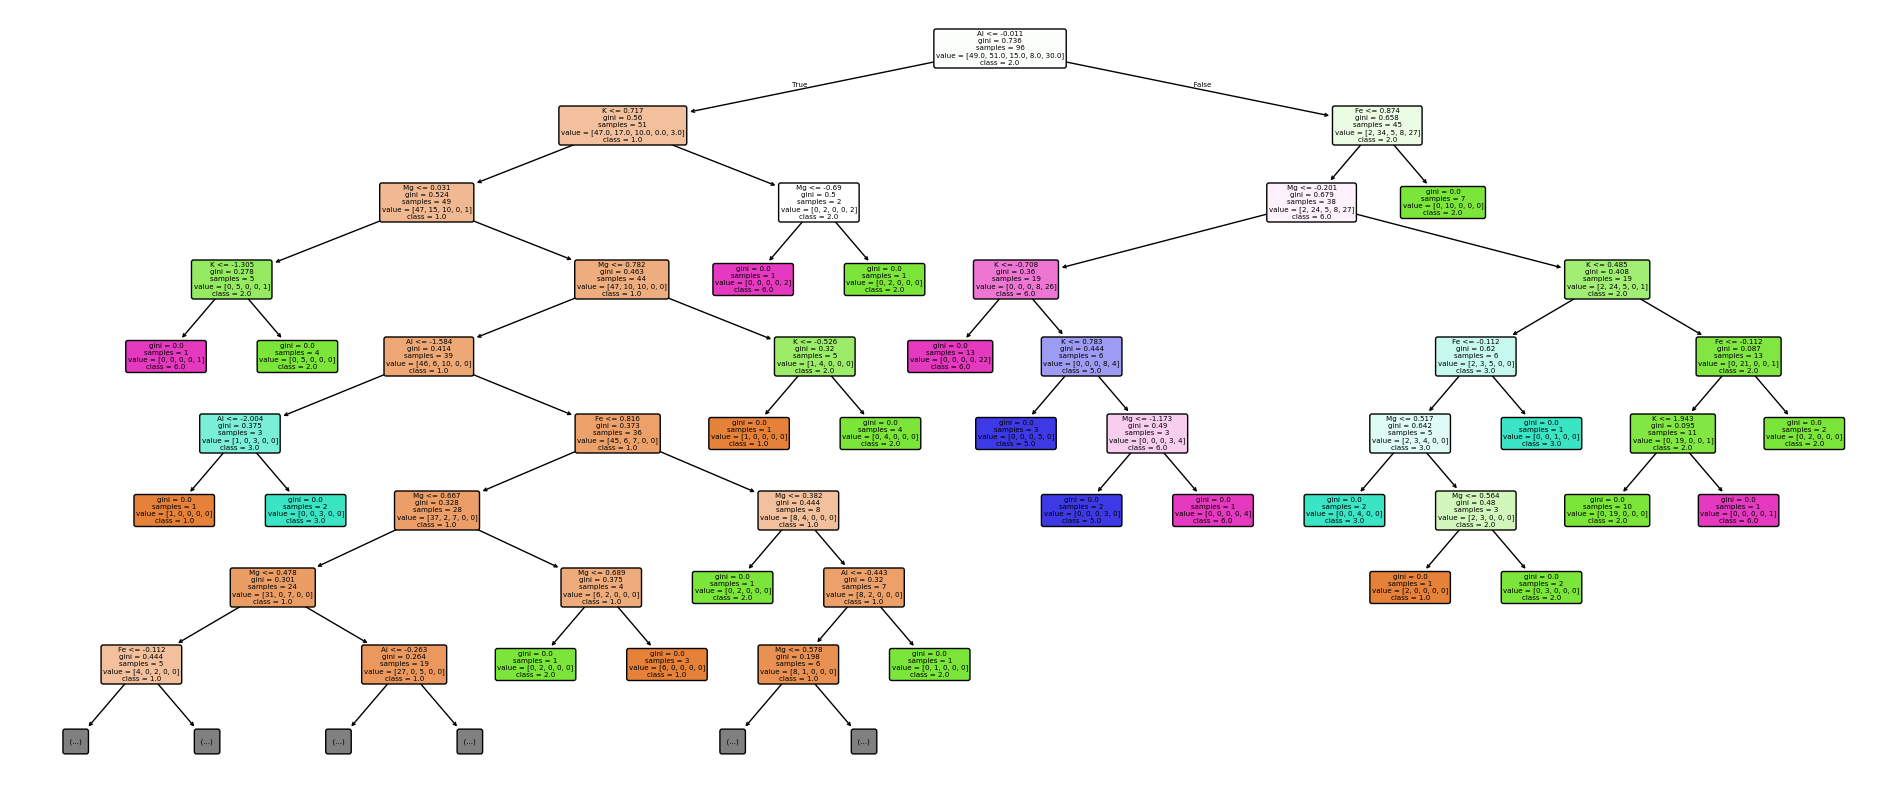

In [241]:
plt.figure(figsize=(24,10))
plot_tree(rand_for.estimators_[50],filled=True,feature_names=list(x_train),class_names=[str(value) for value in df["Type"].unique()],rounded=True,max_depth=8)
plt.show();

In [242]:
y_pred_rand_for = rand_for.predict(x_test)
accuracy_score(y_test,y_pred_rand_for)

0.6744186046511628

In [243]:
params= {'n_estimators':[50,100],'max_samples':[0.5,0.9]}
grid_search= GridSearchCV(estimator=rand_for,param_grid=params,cv=5)
grid_search.fit(x_train,y_train)
grid_search.best_params_, grid_search.best_score_

({'max_samples': 0.9, 'n_estimators': 50}, np.float64(0.7235294117647059))

In [244]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,1.0


# 5. Boosting

In [245]:
# 1. Ada Boosting - (Logistic Regression)
ada_boost = AdaBoostClassifier(estimator=LogisticRegression(),n_estimators=100,random_state=150)
ada_boost.fit(x_train,y_train)
y_pred_ada_boosting = ada_boost.predict(x_test)
accuracy_score(y_test,y_pred_ada_boosting)

0.5348837209302325

In [246]:
params={'n_estimators':[50,100,150]}
grid_search= GridSearchCV(estimator=ada_boost,param_grid=params, cv=5)
grid_search.fit(x_train,y_train)
grid_search.best_params_, grid_search.best_score_

({'n_estimators': 50}, np.float64(0.5529411764705883))

In [247]:
# 2. Gradient Boosting
grad_boost= GradientBoostingClassifier(n_estimators=100,learning_rate=0.5, subsample=0.9,max_features=1)
grad_boost.fit(x_train,y_train)
y_pred_grad_boosting= grad_boost.predict(x_test)
accuracy_score(y_test,y_pred_grad_boosting)

0.3023255813953488

In [248]:
params={'n_estimators':[50,100],'learning_rate':[0.1,0.5]}
grid_search= GridSearchCV(estimator=grad_boost,param_grid=params, cv=5)
grid_search.fit(x_train,y_train)
grid_search.best_params_, grid_search.best_score_

({'learning_rate': 0.1, 'n_estimators': 100}, np.float64(0.6882352941176472))

In [249]:
# 3. XG Boost
xg_boost = xgb.XGBClassifier(n_estimators=100,learning_rate=0.1,min_child_weight=1,
                            subsample=0.9,max_features=1,reg_alpha=10,reg_lambda=10)

In [250]:
def transform_y(data):
    return [0 if int(value) == 1 else 1 if int(value) == 2 else  2 if int(value) == 3 else  3 if int(value) == 5 else 4 for value in data]

y_train = transform_y(y_train)
y_test = transform_y(y_test)

In [251]:
xg_boost.fit(x_train,y_train)
y_pred_xg_boost = xg_boost.predict(x_test)
accuracy_score(y_test,y_pred_xg_boost)

c:\Users\Karthik\Desktop\Excelr\Python\Assignments\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "max_features" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.5813953488372093

In [252]:
params={'n_estimators':[50,100],'learning_rate':[0.1,0.5],'min_child_weight':[1,2,3]}
grid_search= GridSearchCV(estimator=xg_boost,param_grid=params, cv=5)
grid_search.fit(x_train,y_train)
grid_search.best_params_, grid_search.best_score_

c:\Users\Karthik\Desktop\Excelr\Python\Assignments\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "max_features" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


c:\Users\Karthik\Desktop\Excelr\Python\Assignments\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "max_features" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Karthik\Desktop\Excelr\Python\Assignments\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "max_features" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Karthik\Desktop\Excelr\Python\Assignments\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "max_features" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Karthik\Desktop\Excelr\Python\Assignments\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:34:18] WARNING: C:\actions-runn

({'learning_rate': 0.5, 'min_child_weight': 1, 'n_estimators': 100},
 np.float64(0.6705882352941177))

In [260]:
lgb = lgbm.LGBMClassifier(n_estimators=100,learning_rate=0.1,min_child_weight=1,
                            subsample=0.9,max_features=1,reg_alpha=10,reg_lambda=10,
                             max_bins=10,bundled=True,boosting_type='goss',top_rate=0.2,other_rate=0.3)

In [261]:
lgb.fit(x_train,y_train)
y_pred_lightgbm= lgb.predict(x_test)
accuracy_score(y_test,y_pred_lightgbm)

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: bundled
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: bundled
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000021 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39
[LightGBM] [Info] Number of data points in the train set: 170, number of used features: 4
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score -1.058261
[Ligh

0.5348837209302325

In [259]:
params= {'n_estimators':[50,100],'max_samples':[0.5,0.9]}
grid_search= GridSearchCV(estimator=lgb,param_grid=params,cv=5)
grid_search.fit(x_train,y_train)
grid_search.best_params_, grid_search.best_score_

[LightGBM] [Warning] Unknown parameter: max_samples
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: bundled
[LightGBM] [Warning] Unknown parameter: max_samples
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: bundled
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 40
[LightGBM] [Info] Number of data points in the train set: 136, number of used features: 4
[LightGBM] [Info] Start training from score -1.062507
[LightGBM] [Info] Start training from score -1.020835
[LightGBM] [Info] Start training from score -2.514760
[LightGBM] [Info] Start training from score -3.303217
[LightGBM] [Info] Start training from score -1.734601
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

({'max_samples': 0.5, 'n_estimators': 50}, np.float64(0.6176470588235294))

# 6. Bagging

In [255]:
bag_clas= BaggingClassifier(estimator=LogisticRegression(), n_estimators=50, max_samples=0.9, 
                            max_features=1, bootstrap=True, bootstrap_features=True,random_state=50,oob_score=True)
bag_clas.fit(x_train,y_train)
y_pred_bagging = bag_clas.predict(x_test)
accuracy_score(y_test,y_pred_bagging)

0.5116279069767442

In [256]:
params= {'n_estimators':[50,100],'max_samples':[0.5,0.9]}
grid_search= GridSearchCV(estimator=bag_clas,param_grid=params,cv=5)
grid_search.fit(x_train,y_train)
grid_search.best_params_, grid_search.best_score_

({'max_samples': 0.9, 'n_estimators': 100}, np.float64(0.5705882352941176))

In [ ]:
'''
1) Bagging vs Boosting

Bagging (Bootstrap Aggregating)
 - Trains many models independently on different random samples of the data.
 - Final prediction = average / majority vote.
 - Mainly reduces variance (helps with overfitting).
 - Example: Random Forest.


Boosting
 - Trains models sequentially, each new model focuses more on previous mistakes.
 - Final prediction = weighted sum of models.
 - Mainly reduces bias (builds a strong learner from weak ones).
 - Examples: AdaBoost, Gradient Boosting, XGBoost.

 
Key Differences (quick view)
------------------------------------------------------------------------------------------
Aspect	                    Bagging	                        Boosting
------------------------------------------------------------------------------------------
Training	                Parallel	                    Sequential
Focus	                    Reduce variance	                Reduce bias
Data usage	                Random samples	                Reweighted samples
Sensitivity to noise	    Low                             High
Overfitting                 Helps prevent	                Can overfit noisy data
------------------------------------------------------------------------------------------



2) How to handle the imbalance in data

'''